#LGM-VIP Data Science Internship

##Task 6 - Stock Market Prediction And Forecasting Using Stacked LSTM

Author - Papathoti Solomon Leo

### Importing the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

###Data processing

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [5]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
#Sort the dataset according to the date
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Index is not in order, lets make it in order

In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Plotting the graph of stocks at Close

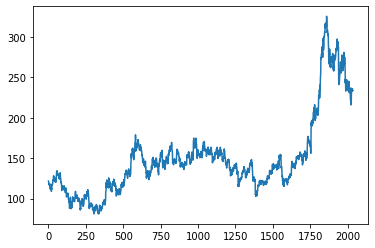

In [10]:
plt.plot(df['Close'])

In [11]:
df1 = df['Close']

###Feature Scaling

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

###Splitting the data into training and test sets

In [13]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [14]:
training_size, test_size

(1424, 611)

In [15]:
#convert an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [16]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [18]:
#Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

###Building the Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 13s 147ms/step - loss: 0.0078 - val_loss: 0.0028
Epoch 2/60
19/19 [==============================] - 1s 74ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 1s 74ms/step - loss: 9.5187e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 1s 74ms/step - loss: 8.7717e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 1s 74ms/step - loss: 8.3490e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 1s 74ms/step - loss: 8.0933e-04 - val_loss: 0.0010
Epoch 7/60
19/19 [==============================] - 1s 75ms/step - loss: 7.7002e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 1s 74ms/step - loss: 7.5062e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 1s 74ms/step - loss: 7.1579e-04 - val_loss: 9.1248e-04
Epoch 10/60
19/19 [==============================] - 1s 77ms/step - loss: 6

In [24]:
#Prediction of scaled test set
test_predict = model.predict(X_test)

In [25]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [26]:
test_predict1

array([[141.79565 ],
       [142.00833 ],
       [141.1547  ],
       [138.57143 ],
       [136.88652 ],
       [136.24747 ],
       [137.3057  ],
       [138.84824 ],
       [139.34406 ],
       [139.09323 ],
       [138.88065 ],
       [139.97676 ],
       [140.71533 ],
       [142.23383 ],
       [144.38419 ],
       [142.52332 ],
       [140.18213 ],
       [139.69125 ],
       [140.18018 ],
       [144.99992 ],
       [149.4319  ],
       [151.80486 ],
       [152.32486 ],
       [150.32524 ],
       [149.96947 ],
       [149.57024 ],
       [149.8712  ],
       [151.50867 ],
       [152.30875 ],
       [152.41486 ],
       [152.83224 ],
       [151.7059  ],
       [148.52626 ],
       [142.94005 ],
       [139.42102 ],
       [138.22433 ],
       [138.27019 ],
       [137.57265 ],
       [135.4895  ],
       [132.02122 ],
       [129.49265 ],
       [128.15675 ],
       [126.05988 ],
       [125.16666 ],
       [123.21244 ],
       [120.7122  ],
       [119.925705],
       [119.5

###Performance Metrics

Mean Square error

In [31]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low 

0.04412902978687998